In [77]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.base     import ClassifierMixin
from sklearn.datasets import load_iris,make_classification
from sklearn.metrics  import *
from sklearn.model_selection import train_test_split

&nbsp;

### Regressão Logistica

Logaritmo das chances : probabilidade de acontecer e não acontecer 

In [78]:
def logit(p:np.array): 
    return np.log( p/(1-p))

In [79]:
probalidade = np.around(np.linspace(0.1,0.9,9),2)
print(probalidade)
logit(probalidade)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


array([-2.19722458, -1.38629436, -0.84729786, -0.40546511,  0.        ,
        0.40546511,  0.84729786,  1.38629436,  2.19722458])

Função sigmoid: é a inversa do logaritmos das chances

In [80]:
def sigmoid(z:np.array):
    return 1.0/( 1.0 + np.exp(-1*z) )

In [81]:
z  = np.linspace(-6,6)
zy = sigmoid(z)

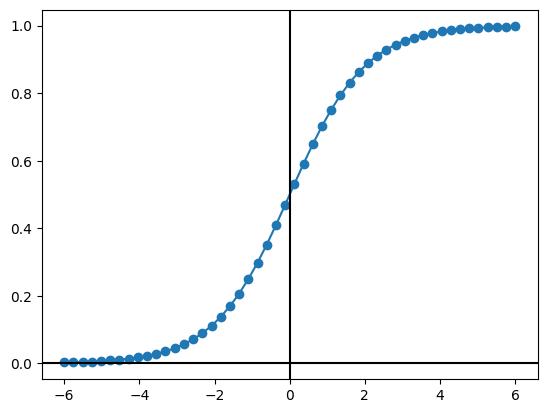

In [82]:
plt.plot(z,zy,'o-')
plt.axvline(0,color='k')
plt.axhline(0,color='k')
plt.show()

### Função de custo|perda (log-loss)
$$
L(\sigma(z),y;w,b) = -y \cdot \log(\sigma(z) ) - (1-y)\cdot \log(1-\sigma(z))
$$

* Se o y = 0 para uma unica instancia de treinamento a função de perda será igual a $(1-y)\cdot \log(1-h_{\theta}(z))$ , a penalidade aumenta a medida que se aproxima de 1
* Se o y = 1 para uma unica instancia de treinamento a função de perda será igual a $-\log(h_{\theta}(x))$ , a penalidade aumenta a medida que se aproxima de 1

In [83]:
def perda1(sigmoid): return -np.log(sigmoid)
def perda2(sigmoid): return -np.log(1-sigmoid)

In [84]:
sigmoidExample = np.linspace(0.001,0.99,100)

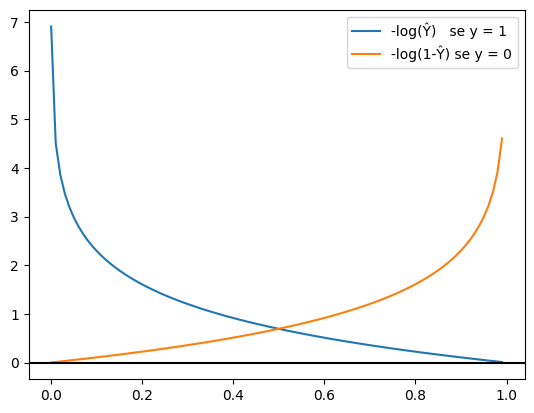

In [85]:
plt.plot(sigmoidExample,perda1(sigmoidExample),label='-log(Ŷ)   se y = 1')
plt.plot(sigmoidExample,perda2(sigmoidExample),label='-log(1-Ŷ) se y = 0')
plt.axhline(0,color='k')
plt.legend(bbox_to_anchor=(1,1,0,0))
plt.show()

In [86]:
pd.concat([pd.DataFrame({'z':sigmoidExample,'-log(1-h(x))':perda2(sigmoidExample)}),pd.DataFrame({'z':sigmoidExample,'-log(h(x))':perda1(sigmoidExample)})],axis=1)

,z,-log(1-h(x)),z,-log(h(x))
0,0.00100,0.001001,0.00100,6.907755
1,0.01099,0.011051,0.01099,4.510779
2,0.02098,0.021203,0.02098,3.864195
3,0.03097,0.031459,0.03097,3.474746
4,0.04096,0.041822,0.04096,3.195169
...,...,...,...,...
95,0.95004,2.996541,0.95004,0.051251
96,0.96003,3.219634,0.96003,0.040790
97,0.97002,3.507232,0.97002,0.030438
98,0.98001,3.912528,0.98001,0.020192


In [87]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,encoding='utf-8')

X = data.iloc[:,[1,2]].values
y = data.iloc[:,4]
y = np.where(y=='Iris-setosa',0,1)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=100, random_state=0)

&nbsp;

### Algoritmo Regressão Logistica

In [88]:
class RegressaoLogisticaGD(ClassifierMixin):
    b_ = None # Vies||Bias
    w_ = None # Pesos
    n_ = None # Numero de caracteristicas

    def __init__(self, eta=0.01, max_iter=50, random_state=1,alpha=0):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.alpha = alpha
    
    def fit(self, X, y):
        self.n_ = np.size(X, axis=1)
        rgen    = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal( loc=0.0, scale=0.01, size=self.n_ )
        self.b_ = np.float64(0.0)

        self.losses_ = [] #F(x) para cada epoca

        for iter in range(self.max_iter):
            somaPonderada = self.somaPonderada(X)
            valorPrevisto = self.activacaoSigmoid(somaPonderada)
            erros = (y-valorPrevisto)

            self.w_ += self.eta * 2.0 * X.T.dot(erros)/np.size(X, axis=0) + (self.alpha*(self.w_))/np.size(X, axis=0)
            self.b_ += self.eta * 2.0 * np.mean(erros)

            loss = -y.dot(np.log(valorPrevisto)) - ((1-y).dot(np.log(1-valorPrevisto)))/np.size(X, axis=0) + (self.alpha*np.linalg.norm(self.w_))/np.size(X, axis=0)
            self.losses_.append(loss)
        return self

    def somaPonderada(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activacaoSigmoid(self, Z):
        return 1./(1. + np.exp(-Z))
    
    def predict(self, X):
        return np.where( self.activacaoSigmoid(self.somaPonderada(X))>=0.5,1,0)          

In [89]:
logitic = RegressaoLogisticaGD(max_iter=100,alpha=1)
logitic.fit(xtrain,ytrain)

In [90]:
logitic.w_,logitic.b_

(array([-0.73283908,  1.05130968]), -0.11132797813019525)

In [91]:
predL = logitic.predict(xtest)

In [92]:
print(classification_report(ytest,predL))
print(accuracy_score(ytest,predL))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


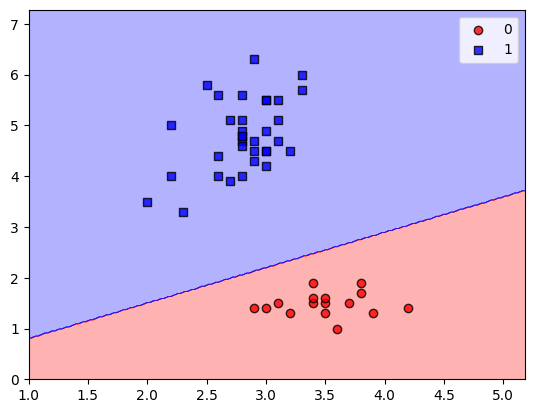

In [93]:
from plots.PlotRegiaDeDecisao import plotDecisionRegion,plotDecisionRegion2

plotDecisionRegion(xtest,ytest,logitic)

&nbsp;

### Soft Max

In [94]:
class SoftMaxGD(ClassifierMixin):
    b_ = None # Vies||Bias
    w_ = None # Pesos
    n_ = None # Numero de caracteristicas
    k_ = None
    def __init__(self, eta=0.1, max_iter=50, random_state=1):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        y += 1
        self.k_ = len(np.unique(y))

        self.n_ = np.size(X, axis=1)
        rgen    = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal( loc=0.0, scale=0.1, size=(self.k_,self.n_))
        self.b_ = np.zeros(shape=(self.k_,1))
        self.losses_ = []
        
        for iter in range(self.max_iter):
           
            erros = []
            for ki in range(self.k_):
                error = (np.where( y == ki+1,ki+1,0 ) - self.ativacaoSoftMax(X,ki)[0])
                erros.append(error)
            
            erros = np.array(erros).T
           
            for ki in range(self.k_):
                self.w_[ki,:] += self.eta * 2.0 * X.T.dot(erros[:,ki])/np.size(X, axis=0)
                self.b_[ki,:] += self.eta * 2.0 * np.mean(erros[:,ki])
            
            error = 0
            for ki in range(self.k_):
                error += np.sum(np.log(np.where( y == ki+1,ki+1,0 )*self.ativacaoSoftMax(X,ki)[0]))
            

        return self

    def somaSoftMax(self, X, ki):
        return np.dot(X, self.w_[ki,:]) + self.b_[ki,:]
        
    def ativacaoSoftMax(self, X, ki):
        n =  np.size(X, axis=0)
        exp1 = np.around(np.exp(self.somaSoftMax(X,ki)),decimals=5)
        exp2 = np.zeros(shape=(1,n))
       
        for ki in range(self.k_):
            exp2+= np.around(np.exp(self.somaSoftMax(X,ki)),decimals=5)

        

        return exp1/exp2

    def predict(self, X):
        soft = []
        for ki in range(self.k_):
            soft.append(self.ativacaoSoftMax(X,ki)[0])
        soft = np.array(soft).T
        return np.array([np.argmax(xi)for xi in soft])

In [95]:
X, y = load_iris(return_X_y=True)
X = X[:,[2,3]]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)


In [96]:
from sklearn.preprocessing import StandardScaler
xtrain = StandardScaler().fit_transform(xtrain)
xtest  = StandardScaler().fit_transform(xtest)

In [97]:
soft = SoftMaxGD(eta=0.01,max_iter=1000,random_state=1)
soft.fit(xtrain,ytrain)

/tmp/ipykernel_4126/1777687842.py:36: RuntimeWarning: divide by zero encountered in log
  error += np.sum(np.log(np.where( y == ki+1,ki+1,0 )*self.ativacaoSoftMax(X,ki)[0]))


In [98]:
np.bincount(ytest)

array([15, 15, 15])

In [99]:
soft.w_

array([[-1.1402494 , -1.28894293],
       [ 4.39171775,  2.92898706],
       [12.42556324, 13.6340767 ]])

In [100]:
pred = soft.predict(xtest)

In [101]:
print(classification_report(ytest+1,pred+1))
print(accuracy_score(ytest+1,pred+1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.13      0.24        15
           3       0.54      1.00      0.70        15

    accuracy                           0.71        45
   macro avg       0.85      0.71      0.64        45
weighted avg       0.85      0.71      0.64        45

0.7111111111111111


In [102]:
confusion_matrix(ytest+1,pred+1)

array([[15,  0,  0],
       [ 0,  2, 13],
       [ 0,  0, 15]])

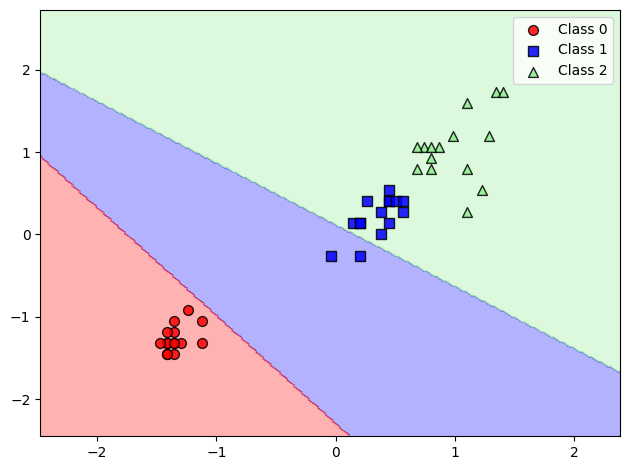

In [103]:
from plots.PlotRegiaDeDecisao import plotDecisionRegion,plotDecisionRegion2

plotDecisionRegion2(xtest,ytest,soft)

&nbsp;

### Logistica OVR

In [156]:
class RegressaoLogisticaOvr(ClassifierMixin):
    def __init__(self, max_iter=100, random_state=None):
        self.max_iter = max_iter
        self.random_state = random_state
        self.listEstimator = None

    def fit(self, X, y):
        labels = np.unique(y)
        self.listEstimator = {}
        for classi in labels:
            y_bin = np.where(y == classi, 1, 0)
            estimator = RegressaoLogisticaGD(max_iter=self.max_iter, random_state=self.random_state)
            estimator.fit(X, y_bin)
            self.listEstimator[classi] = estimator
        return self

    def predict(self, X):
        if self.listEstimator is None:
            raise TypeError('None')
        
        pred = []
        for xi in X:
            class_scores = {}
            for key, estimator in self.listEstimator.items():
                class_scores[key] = estimator.predict(xi.reshape(1, -1)).item()
            pred.append(max(class_scores, key=class_scores.get))
        return np.array(pred)


In [179]:
X, y = load_iris(return_X_y=True)
X = X[:,[0,1]]
X = ().fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

In [180]:
reg = RegressaoLogisticaOvr(max_iter=1000,random_state=10)
reg.fit(xtrain,ytrain)

In [181]:
pred = reg.predict(xtest)
pred

array([0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2])

In [182]:
reg.listEstimator[0].w_,reg.listEstimator[1].w_,reg.listEstimator[2].w_

(array([-2.02887858,  1.63066739]),
 array([-0.01251836, -1.2458791 ]),
 array([ 1.76873428, -0.1890118 ]))

In [183]:
print(classification_report(ytest,pred))
print(accuracy_score(ytest,pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        15
           1       0.56      0.33      0.42        15
           2       0.58      0.47      0.52        15

    accuracy                           0.60        45
   macro avg       0.59      0.60      0.57        45
weighted avg       0.59      0.60      0.57        45

0.6


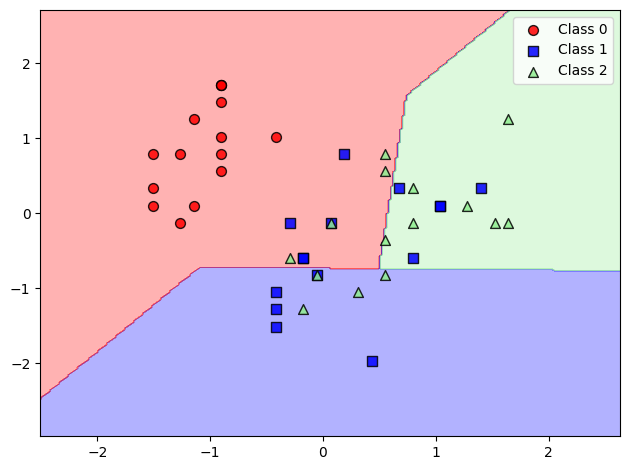

In [184]:
plotDecisionRegion2(xtest,ytest,reg)